# K-Mediods

## Get Data

In [3]:
import pandas as pd

inputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW2/1/hw2-image.txt', delimiter=' ', names=['R', 'G', 'B'])

inputs

,R,G,B
0,129,108,61
1,117,96,51
2,102,77,36
3,94,64,26
4,97,59,22
...,...,...,...
210007,91,38,4
210008,88,39,6
210009,81,36,7
210010,71,31,6


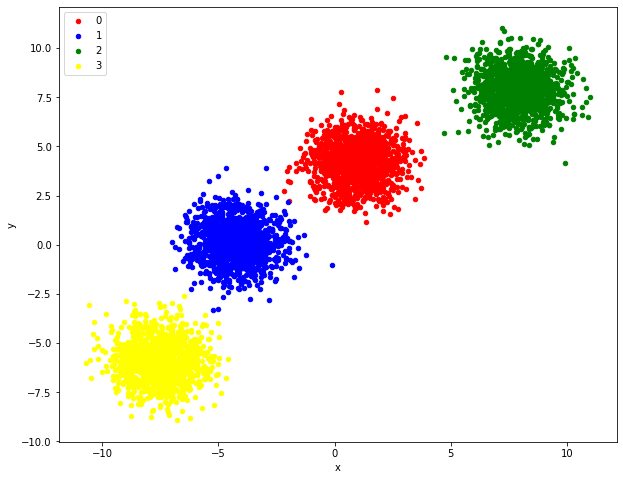

In [82]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

pyplot.rcParams["figure.figsize"] = (10,8)


# generate 2d classification dataset
X, y = make_blobs(n_samples=5000, centers=4, n_features=2, random_state=3)

# X = X.astype(int)


# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()


In [27]:
X, y

(array([[-4,  0],
        [ 0,  2],
        [ 0,  3],
        ...,
        [-3,  1],
        [ 7,  6],
        [ 3,  4]]), array([1, 0, 0, ..., 1, 2, 0]))

## Distance Function
![alt text](dist.png "Title")

In [5]:
import math
def distance(x, y):
    d = len(x)
    sum = 0
    for i in range(d):
#         print(i)
        sum += int(math.pow((x[i]-y[i]),2))
    return sum

## Cost Function
![alt text](cost.png "Title")

In [6]:
def cost(clusters, z):
    cost = 0

    
    for i, cluster in enumerate(clusters):
        if(len(cluster)!=0):
            for j, x in enumerate(cluster):
                cost += distance(x, z[i])
        
    return cost
        

In [21]:
x_int = X.astype(int)
x_int

array([[-3, -1],
       [-5,  1],
       [ 8,  7],
       ...,
       [ 6,  8],
       [ 7,  8],
       [ 7,  7]])

## Mean of a Cluster

In [7]:
def total_dist(cluster, z):
    dist = 0
    for i, xi in enumerate(cluster):
        dist += distance(xi, z)
    return dist

In [48]:
def set_z(cluster):
    min_dist = 100000
    min_x = 0
    for i, x in enumerate(cluster):
#         print("checking point number", i, " point: ",x)
        dist = total_dist(cluster, x)
        if(dist<min_dist):
            min_dist = dist
            min_x = x
    z = []
    for point in min_x:
        z.append(point)
    
    return z
        

## K Mediods Algorithm
![alt text](km.png "Title")

In [51]:
# x.shape = 210012 rows × 3 columns
# z.shape = k rows x 3 columns
def k_means(x, k, z):
    clusters = [[] for i in range(k)]
    
    
    for i, xi in enumerate(x):
        min_distances = []
        dist = 1000000
        j_min = 0
        for j, zj in enumerate(z):
            if(dist>distance(xi, zj)):
                dist=distance(xi, zj)
                j_min = j
        clusters[j_min].append(xi)

    old_clusters = clusters.copy()
    old_z = [[] for i in range(len(z))]
    count =0
    cost_total = []
    while(old_z != z):
        count+=1
        print("iteration: ",count)
        old_clusters = clusters.copy()
        old_z = z.copy()
        print("new z = ",z)
        clusters = [[] for i in range(len(clusters))]
        for i, xi in enumerate(x):
            min_distances = []
            dist = 1000000
            j_min = 0
            for j, zj in enumerate(z):
                if(dist>distance(xi, zj)):
                    dist=distance(xi, zj)
                    j_min = j
            clusters[j_min].append(xi)

        
        z_removed = []
        for i, cluster in enumerate(clusters):
            if (len(cluster)!=0):
                z_removed.append(set_z(cluster))
            
        for cluster in clusters:
            if(len(cluster)==0):
                clusters.remove(cluster)
        
        z = z_removed.copy()
        
        cost_total.append(cost(clusters,z))
#         print("old z = ", old_z)
#         print("z at end of loop = ", z)

    return clusters, z, cost_total
            

In [83]:
zi = [ [ 7,  6],
        [ 0,  2],
        [ 0,  3], 
     [-3, 1]]
c, z, cost_total = k_means(X, 4, zi)


iteration:  1
new z =  [[7, 6], [0, 2], [0, 3], [-3, 1]]
iteration:  2
new z =  [[7.789987054213856, 7.883396785309039], [0.9595049295038608, 2.07681451446142], [0.8881959936056498, 4.411124479508919], [-6.481343968696917, -2.62821758144489]]
iteration:  3
new z =  [[7.789987054213856, 7.883396785309039], [-0.430610957592203, 1.745367392606909], [0.8919178173295043, 4.589490389864836], [-6.659449507213229, -3.280384885868376]]
iteration:  4
new z =  [[7.789987054213856, 7.883396785309039], [-2.810199182119196, 0.8733582832462942], [1.095655042665506, 4.513489193270844], [-6.629113677831883, -4.1215426093685394]]
iteration:  5
new z =  [[7.789987054213856, 7.883396785309039], [-4.100028950480548, 0.13043710240981465], [1.116886441574794, 4.23611336327882], [-7.315900974734557, -5.736280987064237]]
iteration:  6
new z =  [[7.789987054213856, 7.883396785309039], [-4.100028950480548, 0.13043710240981465], [0.8633626363550546, 4.132160031304052], [-7.540578498101812, -5.906631491529283]]


### Number of Clusters:

In [78]:
len(c)

4


### Final centroids of each cluster:


In [79]:
z

[[7, 7], [-4, 0], [1, 4], [-7, -5]]

### Number of pixels associated to each cluster:


In [80]:
for i, cluster in enumerate(c):
    print("Cluster ",i, " has ", len(cluster), " pixels.")

Cluster  0  has  1249  pixels.
Cluster  1  has  1249  pixels.
Cluster  2  has  1252  pixels.
Cluster  3  has  1250  pixels.


## Check Clusters on Graph

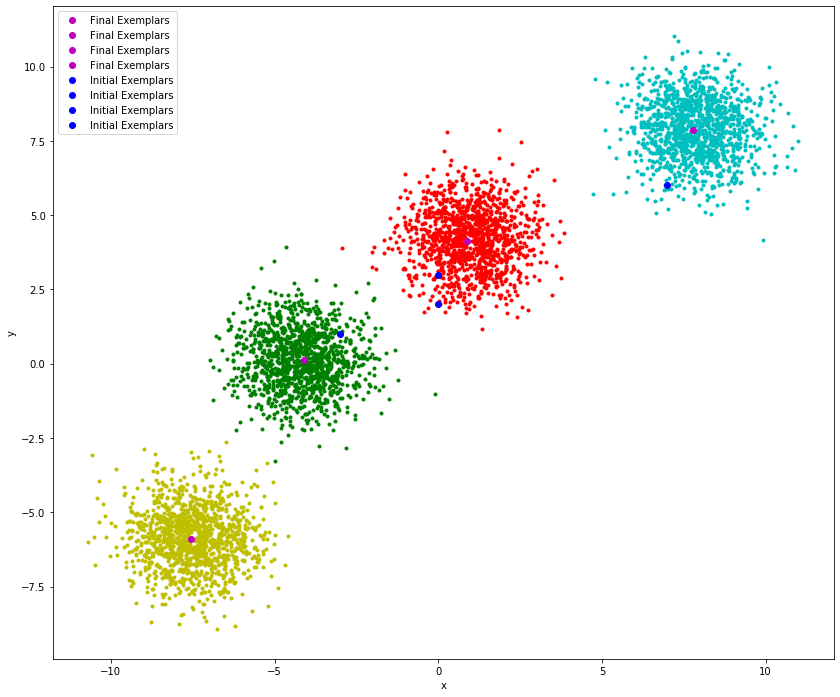

In [87]:
pyplot.rcParams["figure.figsize"] = (14,12)


colors = {0: 'c.', 1: 'g.', 2: 'r.', 3: 'y.'}
for key, cluster in enumerate(c):
    for x in cluster:
        plt.plot(x[0], x[1], colors[key])

for point in z:
    plt.plot(point[0], point[1], 'mo', label="Final Exemplars")

for point in zi:
    plt.plot(point[0], point[1], 'bo', label="Initial Exemplars")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()